In [120]:
from mathphys.constants import elementary_charge, light_speed
import pyaccel as pa
from pymodels import si
import numpy as np
import matplotlib.pyplot as plt

In [121]:
model = si.create_accelerator()

In [122]:
#model = pa.lattice.refine_lattice(model,0.001,fam_names=["BC"])

In [123]:
fam_data=si.get_family_data(model)
BC = fam_data['BC']

In [153]:
BC["index"][1]

[474,
 475,
 476,
 478,
 479,
 480,
 482,
 483,
 485,
 486,
 487,
 488,
 489,
 490,
 491,
 492,
 493,
 496,
 497,
 498,
 499,
 500,
 501,
 502,
 503,
 504,
 506,
 507,
 509,
 510,
 511,
 513,
 514,
 515]

In [125]:
spos = pa.lattice.find_spos(model)

In [126]:
len(model)

6548

In [127]:
E0 = model.energy
R = E0/(light_speed)
B_values = []
Bf_values = []
G_values = []
K_values = []
i_values = list(range(len(model)))

In [128]:
len(i_values)
len(spos)

6548

In [129]:
print(E0)

3000000000.0


In [130]:
for i in i_values:
    dtheta = model[i].angle
    length = model[i].length

    if length == 0:
        try:
            G = G_values[-1]
        except:
            G = 0
    
    else:
        G = dtheta/length
        
    try:
        K = model[i].polynom_b[1]
    except ZeroDivisionError:
        K=0
    
    try:
        Bf = model[i].polynom_b[1]*R
    except ZeroDivisionError:
        Bf = 0

    try:
        B = G*R
    except ZeroDivisionError:
        B = 0
   
    K_values.append(K)
    G_values.append(G)
    B_values.append(B)
    Bf_values.append(Bf)

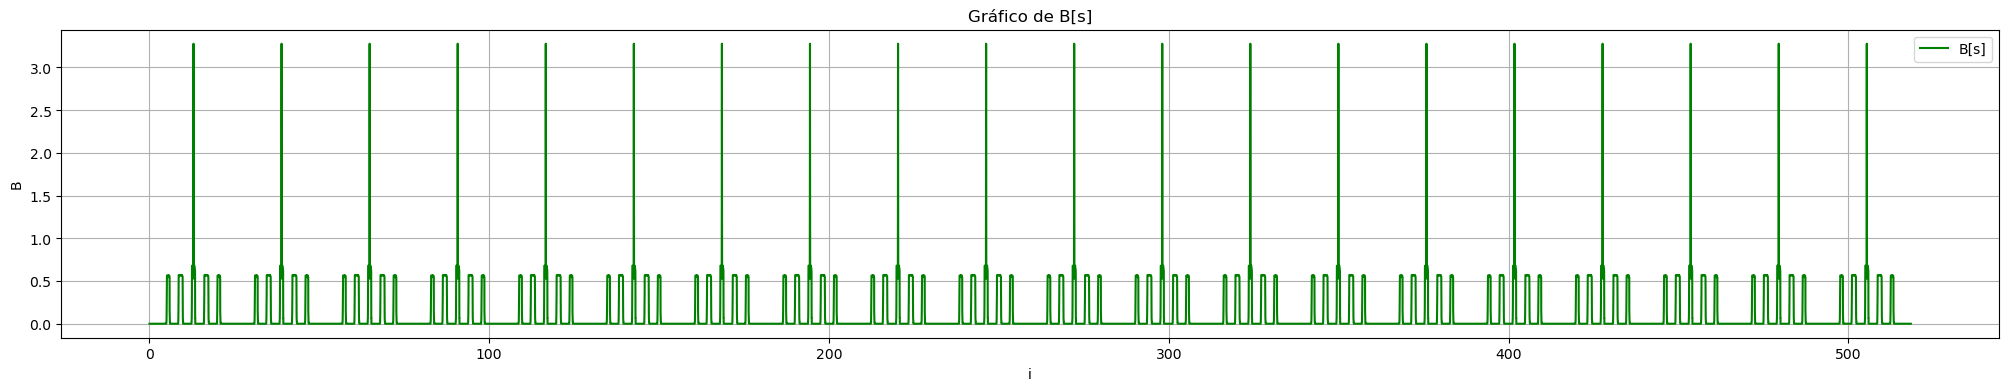

In [131]:
%matplotlib inline
plt.figure(figsize=(25,4))
#plt.xlim(0,int(s_values[-1]/20))
plt.plot(spos, B_values, linestyle='-', color='green', label='B[s]')
plt.xlabel('i')
plt.ylabel('B')
plt.legend()
plt.title('Gráfico de B[s]')
plt.grid(True)
plt.show()

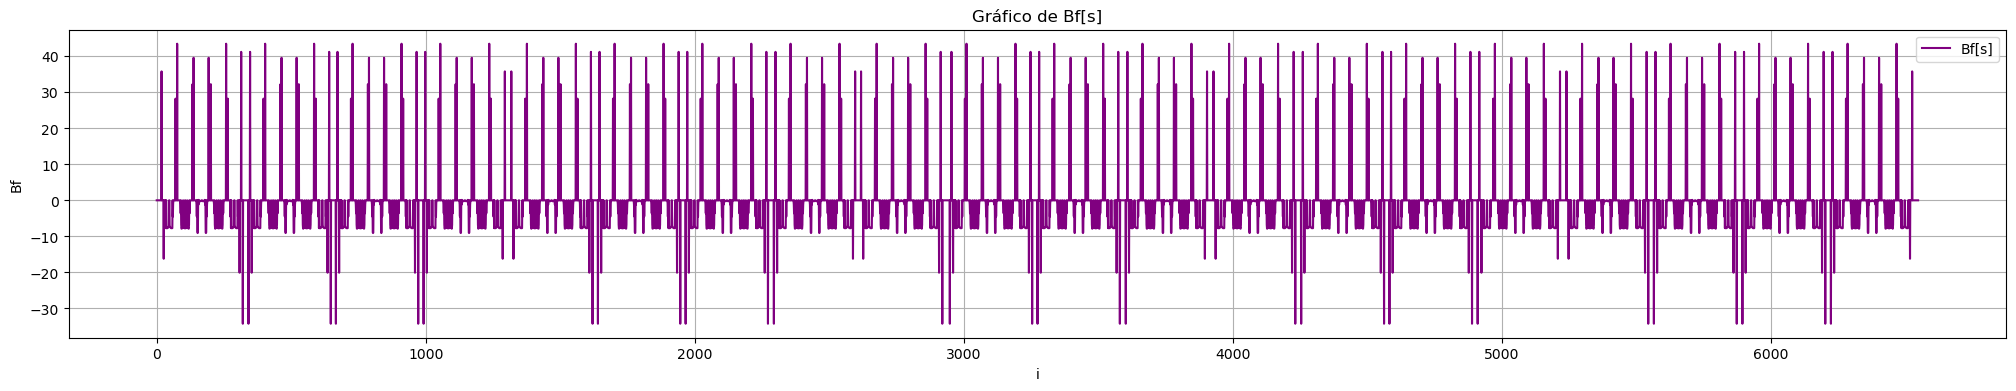

In [132]:
plt.figure(figsize=(25,4))
plt.plot(i_values, Bf_values, linestyle='-', color='purple', label='Bf[s]')
plt.xlabel('i')
plt.ylabel('Bf')
plt.legend()
plt.title('Gráfico de Bf[s]')
plt.grid(True)
plt.show()

In [133]:
lengths = np.array([ele.length for ele in model])
angles = np.array([ele.angle for ele in model])
spos = pa.lattice.find_spos(model)

nzero_len = lengths !=0
lengths = lengths[nzero_len]
angles = angles[nzero_len]
G = angles/lengths

In [134]:
qf = pa.lattice.find_indices(model, "fam_name", "QFA")[0]

In [135]:
model[qf].angle

0.0

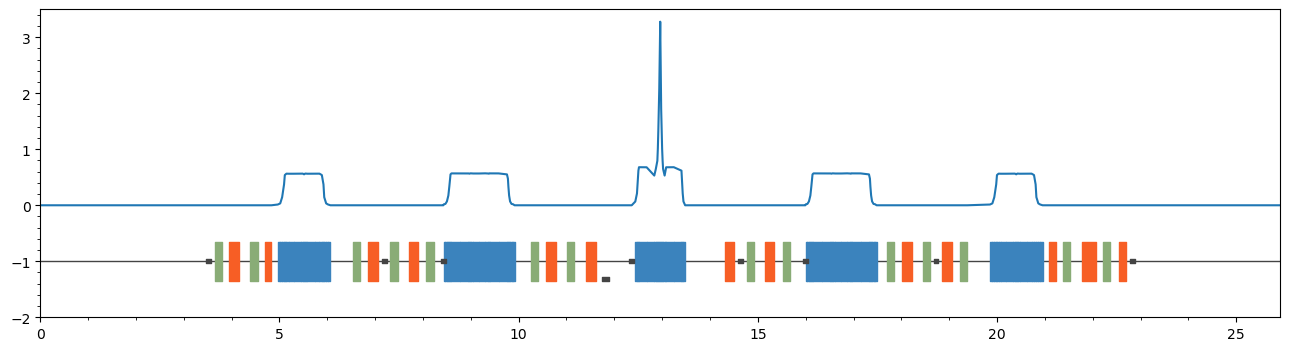

In [136]:
indices = np.array(i_values)

plt.figure(figsize=(16,4))
plt.xlim(0,model.length/20)
plt.ylim(-2,3.5)
plt.plot(spos[nzero_len],G*R)
# plt.plot(indices[nzero_len],G*R)
plt.minorticks_on()
pa.graphics.draw_lattice(model,offset=-1,height=0.7,gca=True)
plt.show()

In [137]:
model[0].polynom_b[1]

0.0

In [138]:
print(model[3].K)

0.0


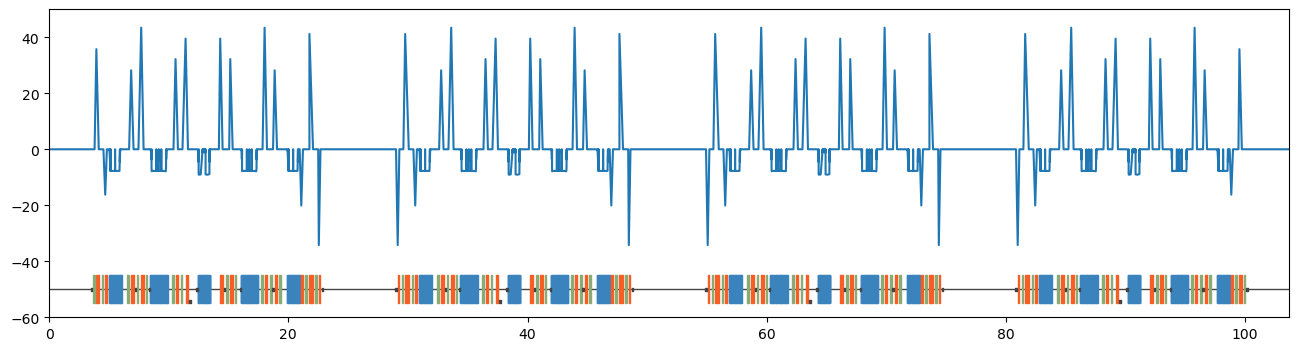

In [139]:
#lengths = np.array([ele.length for ele in model])
#nzero_len = lengths !=0
#spos = pa.lattice.find_spos(model)
Bf = np.array([ele.polynom_b[1] for ele in model])*R

plt.figure(figsize=(16,4))
plt.xlim(0,model.length/5)
plt.ylim(-60,50)
plt.plot(spos,Bf)
pa.graphics.draw_lattice(model,offset=-50,height=10,gca=True)
plt.show()

In [140]:
print(spos[6000])

476.3271574999939


In [141]:
b0_qf = G[qf] * R
b1_qf = Bf[qf]

In [142]:
print(b0_qf,b1_qf)

0.013588061892320067 35.75651382073239


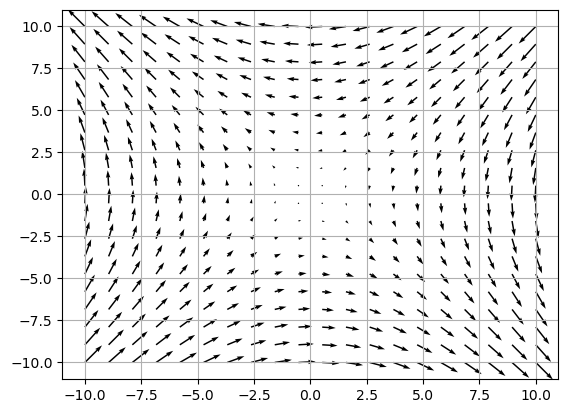

In [143]:
s_escolhido = 18
x,y = np.meshgrid(np.linspace(-10, 10, 20),np.linspace(-10,10,20))

u = -Bf[s_escolhido]*y
v = -G[s_escolhido]*R-Bf[s_escolhido]*x

plt.quiver(x,y,u,v)
plt.grid('on')
plt.show()

In [144]:
print(model[4993].K)

-0.77165


In [145]:
fam_data = si.get_family_data(model)
Q1 = fam_data['B1']
Q1

{'index': [[29,
   30,
   31,
   32,
   34,
   36,
   37,
   38,
   39,
   40,
   41,
   42,
   43,
   44,
   45,
   48,
   49,
   50,
   51,
   52,
   53,
   54,
   55,
   56,
   57,
   58,
   60,
   61,
   62,
   63],
  [271,
   272,
   273,
   274,
   276,
   278,
   279,
   280,
   281,
   282,
   283,
   284,
   285,
   286,
   287,
   290,
   291,
   292,
   293,
   294,
   295,
   296,
   297,
   298,
   299,
   300,
   302,
   303,
   304,
   305],
  [356,
   357,
   358,
   359,
   361,
   363,
   364,
   365,
   366,
   367,
   368,
   369,
   370,
   371,
   372,
   375,
   376,
   377,
   378,
   379,
   380,
   381,
   382,
   383,
   384,
   385,
   387,
   388,
   389,
   390],
  [598,
   599,
   600,
   601,
   603,
   605,
   606,
   607,
   608,
   609,
   610,
   611,
   612,
   613,
   614,
   617,
   618,
   619,
   620,
   621,
   622,
   623,
   624,
   625,
   626,
   627,
   629,
   630,
   631,
   632],
  [681,
   682,
   683,
   684,
   686,
   688,
   689,
 